# Evaluation - Samples

## Sample Scenario
My students have just completed the first exam in the spring semester literature class. I want to know if there is anyone I should be concerned about at this point so that we can get ahead of a problem before it forms.

I have the data from last semester's class. Neither the content nor the exams have changed in any way, so I'm hoping I can use that data to find the line that most closely predicts final grades. Once I find the "Line of Best Fit" or the "Regression Line", I can use the equation to calculate the current students' final grades using their first exam grades.

There are 3 questions we need to answer:

1. How would we find that line?
2. How do we evaluate our model, and how do we know if it's good enough?
3. Are our features valuable?

In [8]:
# prepare environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from viz import evaluation_example1, evaluation_example2, evaluation_example3,\
    evaluation_example4, evaluation_example5

In [9]:
plt.rc("axes.spines", top=False, right=False)


# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), 
                  columns = ['x', 'y'])

x = df['x']
y = df['y']

df.head(3)

,x,y
0,100,96
1,93,90
2,84,89


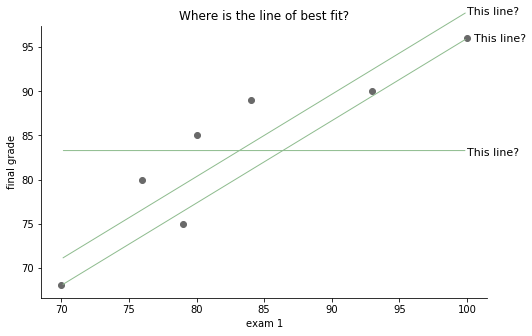

In [3]:
evaluation_example1(df, x, y)

### Q1. How do we find the Line of Best Fit?

In [10]:
from statsmodels.formula.api import ols

ols_model = ols('y ~ x', data=df).fit()

df['yhat'] = ols_model.predict(x)

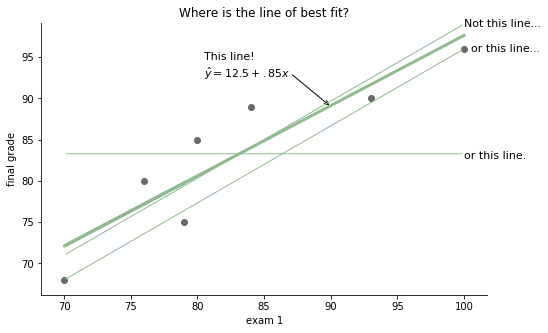

In [11]:
evaluation_example2(df, x, y)

### Q2. Is our model good enough?
In other words, is the model better than having no model at all?

Does the model fit the data better than having no model, or better than using no indpendent variables? Basically, is using a variable input better than just predicting based on the existing value of the dependent variable (such as the mean or previous value)?

How to evaluate the model:
   1. Compute evaluation metrics for the model we built.
   2. Compute evaluation metrics for a baseline model ($\hat{y} = μ_y$)
   3. Check the p-value for the F statistic

### 1. Compute evaluation metrics for our model

#### The Residuals

The thick green line is our regression line. It passes through the values for exam1 ($x$) and the predicted values for final grade ($\hat{y}$)

The residuals are the foundation for evaluating the effectiveness of a regression model.

Residuals: for each data point, 
($\hat{y} − \bar{y}$)

In [12]:
# compute residuals
df['residual'] = df['yhat'] - df['y']

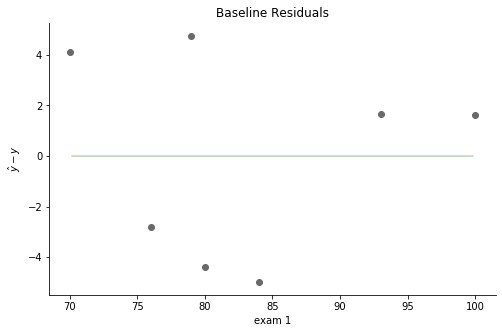

In [13]:
evaluation_example5(df, x, df.residual)

#### Evaluation Metrics

We will use the residuals to evaluate using these common methods:

**SUM OF SQUARED ERRORS (SSE OR RSS, RESIDUAL SUM OF SQUARES)**
   - If outliers matter, this is a good metric to use.
   - How: Square each residual value, $(\hat{y} − y)^2$, and sum across all observations.


<center>
    <strong>SSE</strong>
    = 
    $\sum_{i=1}^n(\hat{y}−y_i)^2$</center>